<a href="https://colab.research.google.com/github/smallrus-web/AZSII_prz7/blob/main/%D0%90%D1%80%D1%85%D0%B8%D0%BF%D0%BE%D0%B2_%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%B8%D0%B9_prz7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Группа: ББМО-01-23

Студент: Архипов Дмитрий Евгеньевич

Практика 7: Создание и использование
генеративных противоречивых примеров (GANbased Adversarial Examples)


**1.  Создание простой GAN для генерации противоречивых примеров**




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Загрузка данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
# Добавление одного измерения (для работы CNN)
train_images = np.expand_dims(train_images, axis=-1)

In [ ]:
# Генератор
def build_generator():
 model = tf.keras.Sequential()
 model.add(layers.Dense(128, activation='relu', input_dim=100))
 model.add(layers.BatchNormalization())
 model.add(layers.LeakyReLU())
 model.add(layers.Dense(784, activation='tanh'))
 model.add(layers.Reshape((28, 28, 1)))
 return model


In [ ]:
# Дискриминатор
def build_discriminator():
 model = tf.keras.Sequential()
 model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(28,
28, 1)))
 model.add(layers.LeakyReLU())
 model.add(layers.MaxPooling2D(pool_size=(2, 2)))
 model.add(layers.Flatten())
 model.add(layers.Dense(1, activation='sigmoid'))
 return model


In [ ]:
# Создание моделей
generator = build_generator()
discriminator = build_discriminator()
# Компиляция дискриминатора
discriminator.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Создание GAN
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Функция обучения GAN
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
    for epoch in range(epochs):
        # Обучение дискриминатора
        idx = np.random.randint(0, train_images.shape[0], batch_size // 2)
        real, noise = train_images[idx], np.random.normal(0, 1, (batch_size // 2, 100))
        fake = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(real, np.ones((batch_size // 2, 1)))
        d_loss_fake = discriminator.train_on_batch(fake, np.zeros((batch_size // 2, 1)))
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])  # Используем только значения потерь

        # Обучение генератора
        g_loss = gan.train_on_batch(
            np.random.normal(0, 1, (batch_size, 100)), np.ones((batch_size, 1))
        )

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {d_loss}] [G loss: {g_loss}]')

# Обучение GAN
train_gan(generator, discriminator, gan)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0 [D loss: 0.7654359340667725] [G loss: [array(0.7877852, dtype=float32), array(0.7877852, dtype=float32), array(0.3203125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

**2. Генерация противоречивых примеров с помощью GAN**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


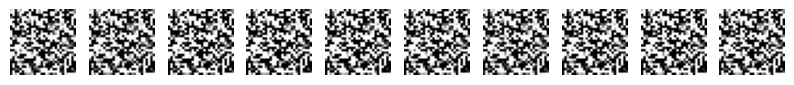

In [ ]:
# Генерация противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
 noise = np.random.normal(0, 1, (n_samples, 100))
 generated_images = generator.predict(noise)
 return generated_images
# Генерация 100 примеров
adversarial_images = generate_adversarial_examples(generator, 100)
# Визуализация противоречивых примеров
plt.figure(figsize=(10, 10))
for i in range(10):
 plt.subplot(1, 10, i+1)
 plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')
 plt.axis('off')
plt.show()


**3. Оценка моделей на противоречивых примерах**



In [ ]:
# Загрузка обученных моделей
model1 = tf.keras.models.load_model('mnist_model1.h5')
model2 = tf.keras.models.load_model('mnist_model2.h5')
# Оценка первой модели на противоречивых примерах
adv_images_reshaped = adversarial_images.reshape(-1, 28, 28, 1)
loss1, acc1 = model1.evaluate(adv_images_reshaped, np.ones((100, 10)))
#Примерные метки
print(f'Accuracy of model1 on adversarial GAN examples: {acc1}')
# Оценка второй модели на противоречивых примерах
loss2, acc2 = model2.evaluate(adv_images_reshaped, np.ones((100, 10)))
#Примерные метки
print(f'Accuracy of model2 on adversarial GAN examples: {acc2}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 261.5900  
Accuracy of model1 on adversarial GAN examples: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 642.1500
Accuracy of model2 on adversarial GAN examples: 0.0


**4. Вывод**

 Обе модели оказались абсолютно уязвимыми к атакующим примерам, сгенерированным с использованием GAN, что подтверждается нулевой точностью при их оценке. Это свидетельствует о высоком уровне реалистичности созданных данных и о сложности их правильной классификации без предварительной подготовки модели к таким атакам.

Такие результаты подчеркивают важность разработки методов защиты, которые могут повысить устойчивость моделей к подобным угрозам. В частности, для улучшения устойчивости к атакам GAN необходимо внедрить подходы, такие как обучение на атакующих примерах, использование регуляризации, улучшение архитектуры сети, а также разработка методов, способных детектировать и корректировать подобные манипуляции с данными. Данные выводы открывают новые перспективы для разработки более надежных и защищенных систем машинного обучения.